# Covid-19's Impact on Airport Traffic

![picture](airtravel.jpg)

The airline industry was severely impacted by COVID-19. Between international travel restrictions and general hesitation from the public regarding the safety of flying, the industry was forced to ground planes and layoff staff. This notebook explores the impact of covid 19 using a dataset which shows traffic to and from the Airport as a Percentage of the Traffic volume during the baseline period. 

------------------------------------------------------------------

## Importing Libraries and Reading in the Data

In [101]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
#import geoplot as gplt
from shapely.geometry import Point, Polygon
from shapely.geometry import MultiPolygon

In [2]:
# Read in the data

airtraveldata = pd.read_csv("covid_impact_on_airport_traffic.csv")

airtraveldata.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [4]:
airtraveldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


### Column Info

**There are 11 columns:**

* Aggregation Method:Period used to aggregate data
* Date: Date in YYYY-MM-DD format
* Version: Version of data entry
* AirportName: Name of the airport
* PercentOfBaseline: 1st feb to 15 Mar 2020 is the baseline period used to compute changes in air traffic 
* Centroid: Centroid of the airport's polygon
* City: City where airport is located
* State: State where airport is located
* ISO_3166_2: ISO standard for country identification (abbreviations)
* Country: Country where airport is located
* Geography: Aiport's polygon

## Data Manipulation

In [7]:
#Make date column a datetime object
airtraveldata['Date'] = pd.to_datetime(airtraveldata['Date'])


In [10]:
#Create a month column
airtraveldata['Month'] = airtraveldata['Date'].map(lambda x: x.month)

In [57]:
#Dropping unnecessary columns
airtraveldata = airtraveldata.drop(columns = ['AggregationMethod', 'Version'])

In [71]:
#Create a latitude and longitude column for use later
airtraveldata['Long'] = airtraveldata['Centroid'].map(lambda x: float(x.split(" ")[0][6:-1]))
airtraveldata['Lat'] = airtraveldata['Centroid'].map(lambda x: float(x.split(" ")[1][0:-2]))

In [72]:
airtraveldata

,Date,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,Month,Long,Lat
0,2020-04-03,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",4,151.180088,-33.945977
1,2020-04-13,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",4,151.180088,-33.945977
2,2020-07-10,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",7,151.180088,-33.945977
3,2020-09-02,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",9,151.180088,-33.945977
4,2020-10-31,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",10,151.180088,-33.945977
...,...,...,...,...,...,...,...,...,...,...,...,...
7242,2020-06-05,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1...",6,-122.308662,47.450583
7243,2020-10-03,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1...",10,-122.308662,47.450583
7244,2020-07-16,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1...",7,-122.308662,47.450583
7245,2020-07-31,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1...",7,-122.308662,47.450583


## Exploratory Analysis

Flights were pretty propotional across the months. The least number of flights were recorded in December.

<AxesSubplot:ylabel='Month'>

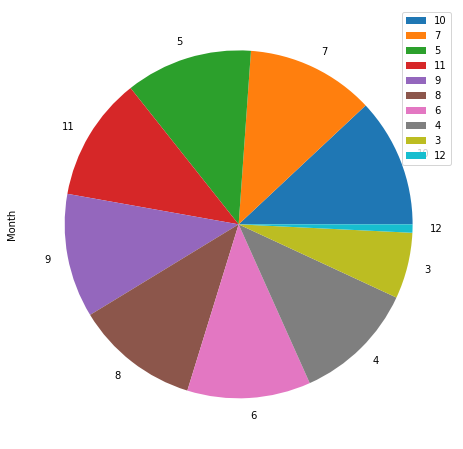

In [77]:
travelbymonth = pd.DataFrame(airtraveldata['Month'].value_counts())


travelbymonth.plot.pie(y = 'Month',figsize=(10,8))

More than half of the flights were from the USA followed by Canada.

<AxesSubplot:ylabel='Country'>

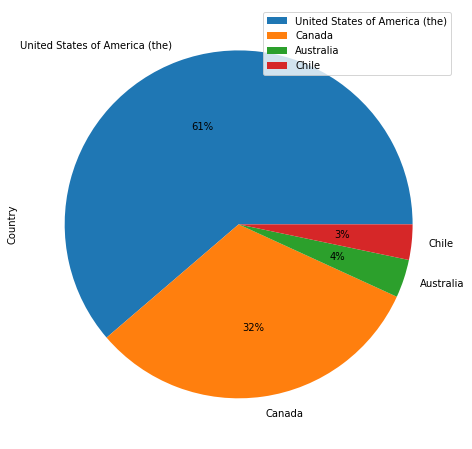

In [78]:
travelbycountry = pd.DataFrame(airtraveldata['Country'].value_counts())


travelbycountry.plot.pie(y = 'Country',figsize=(10,8), autopct = '%.0f%%')

Below we can see how air travel fluctuated over time for all the airports in Canada.

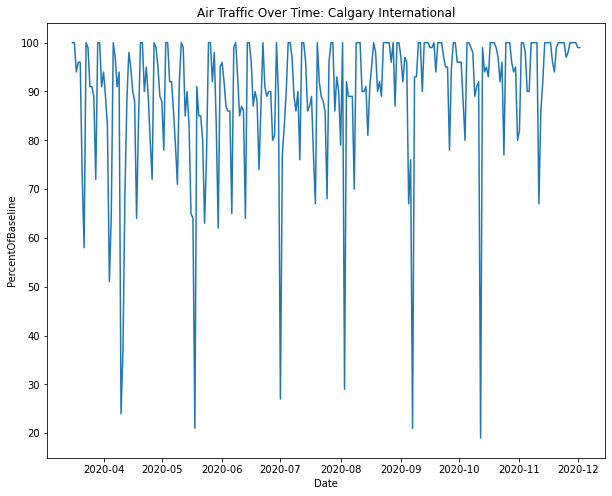

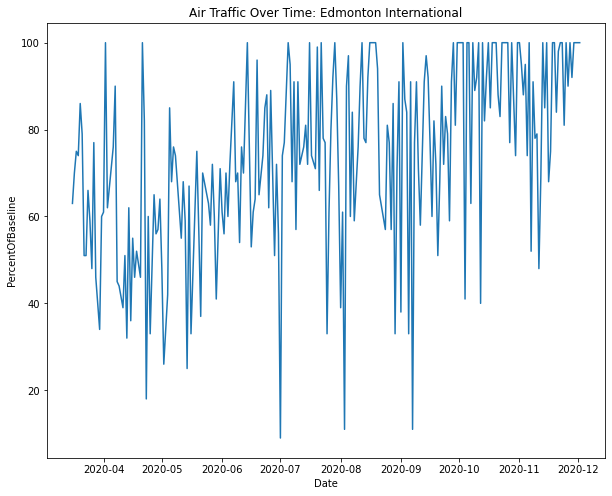

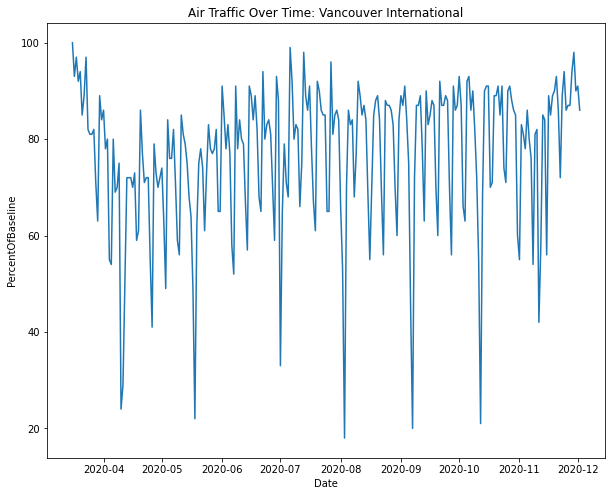

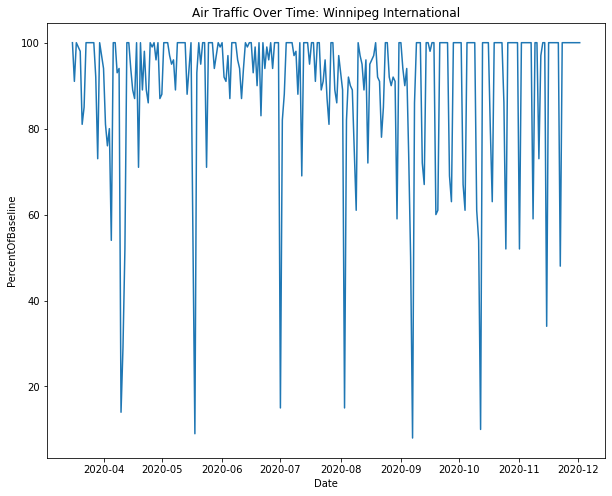

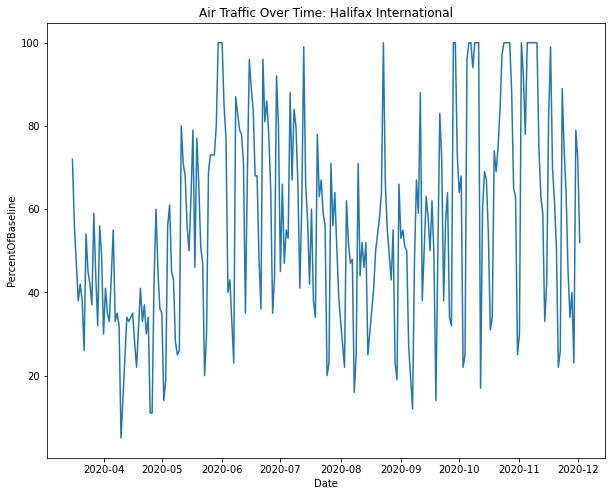

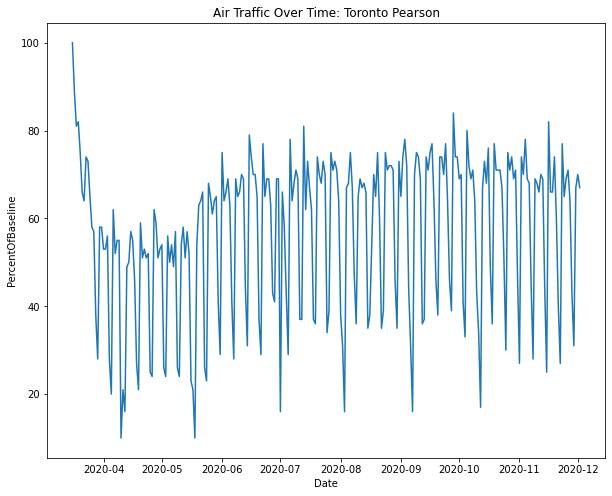

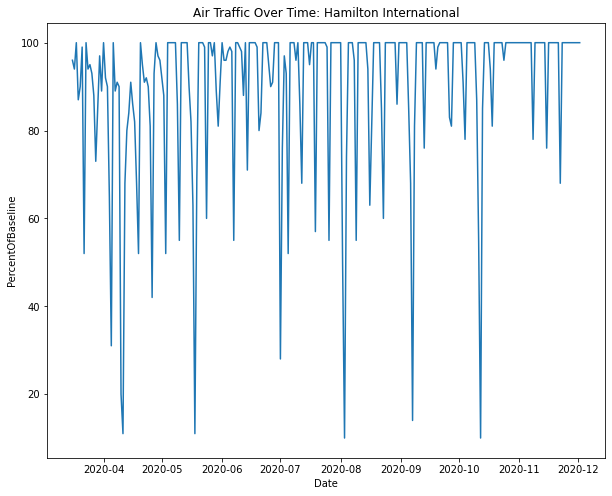

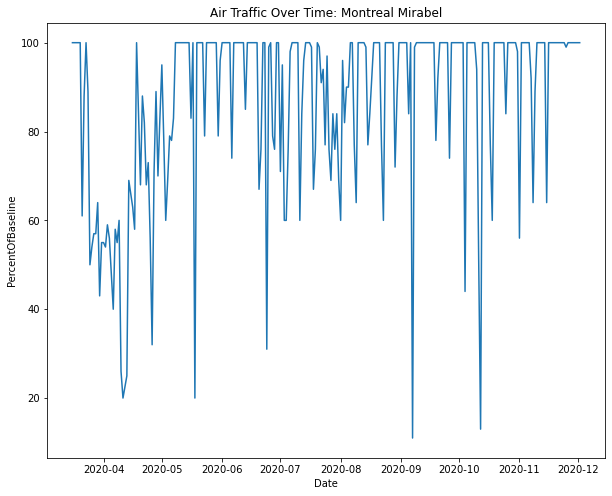

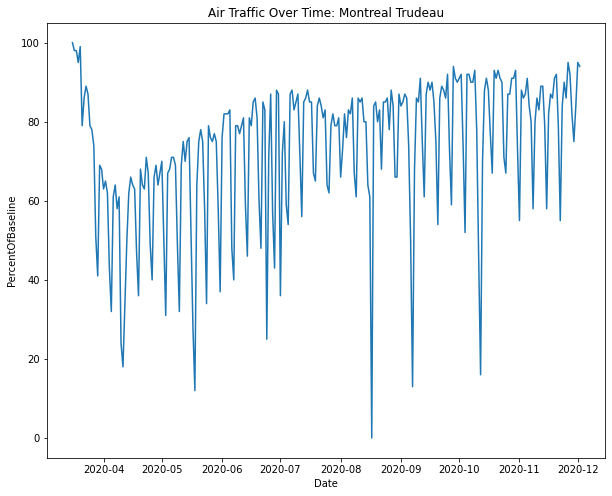

In [79]:
Canadadata = airtraveldata[airtraveldata['Country']=='Canada']
Canadaairports = Canadadata['AirportName'].unique()

for airport in Canadaairports:
    plt.figure(figsize=(10,8))
    sns.lineplot(data = Canadadata[Canadadata['AirportName'] == airport], x = 'Date', y = 'PercentOfBaseline')
    plt.title("Air Traffic Over Time: " + airport)

Not the clearest graph. This might be better as a heatmap in plotly where the percent of baseline is aggregated by mean.

<AxesSubplot:xlabel='Date', ylabel='PercentOfBaseline'>

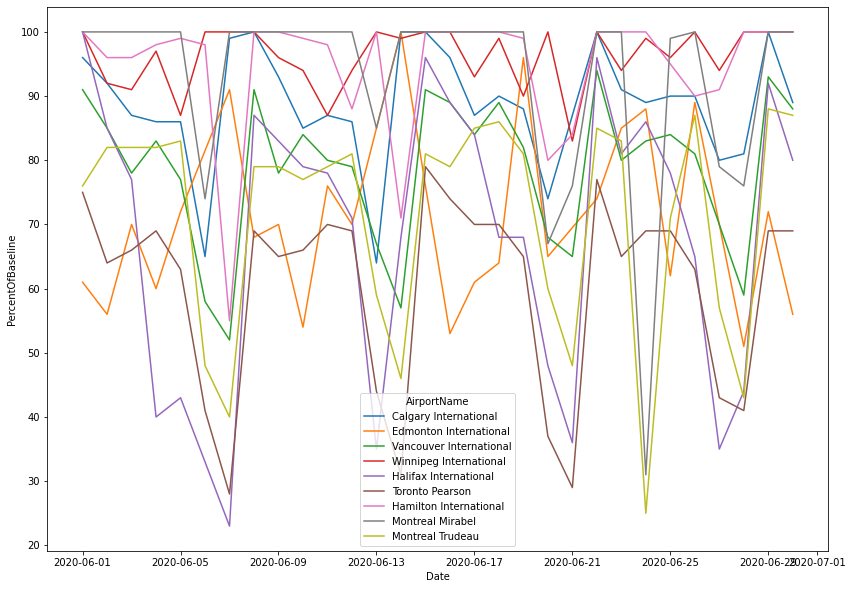

In [80]:
plt.figure(figsize = (14,10))
sns.lineplot(data = Canadadata[Canadadata['Month'] == 6], x = 'Date',y = 'PercentOfBaseline', hue = 'AirportName')

Dallas Fortworth International airport hit 0% of baseline at some point in August. 

In [81]:
#Look at summary statistics for USA Airports
USAdata = airtraveldata[airtraveldata['Country']=='United States of America (the)']
USAdata.groupby(['AirportName'])['PercentOfBaseline'].describe()

,count,mean,std,min,25%,50%,75%,max
AirportName,,,,,,,,
Boston Logan International,261.0,64.704981,8.730645,32.0,60.00,64.0,68.00,97.0
Charlotte Douglas International,261.0,75.375479,16.645305,16.0,66.00,77.0,87.00,100.0
Chicago OHare International,261.0,73.084291,10.516314,21.0,69.00,75.0,80.00,95.0
Dallas/Fort Worth International,262.0,75.293893,18.189548,0.0,65.25,78.0,89.75,100.0
Daniel K. Inouye International,261.0,84.628352,11.720618,31.0,80.00,86.0,92.00,100.0
Denver International,261.0,56.095785,14.979808,12.0,48.00,58.0,68.00,94.0
Detroit Metropolitan Wayne County,261.0,47.432950,8.443039,22.0,43.00,48.0,52.00,84.0
Hartsfield-Jackson Atlanta International,262.0,61.706107,9.478827,0.0,58.00,62.0,66.00,93.0
John F. Kennedy International,262.0,63.072519,15.194224,0.0,53.00,60.0,75.00,93.0


<AxesSubplot:xlabel='Date', ylabel='PercentOfBaseline'>

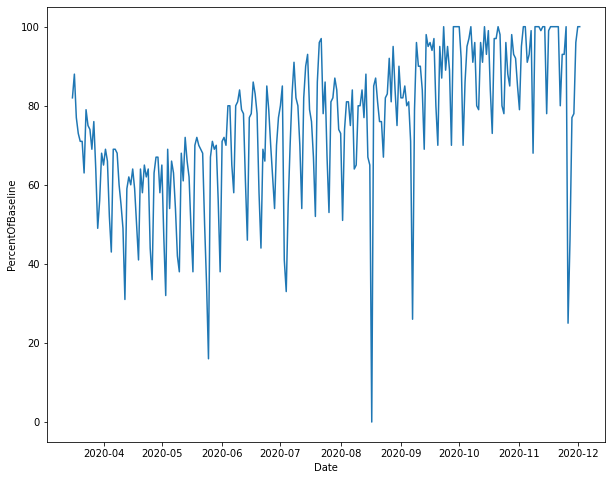

In [82]:
plt.figure(figsize = (10,8))
sns.lineplot(data = USAdata[USAdata['AirportName'] == 'Dallas/Fort Worth International '], x = 'Date', y = 'PercentOfBaseline')

## Visualizations

In [98]:
#Create a dataframe with the mean PercentOfBaseline per month
airtraveldata_monthly = airtraveldata.groupby(['AirportName', 'Month', 'Lat', 'Long'])[['PercentOfBaseline']].mean().reset_index()

In [99]:
#Get world map from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

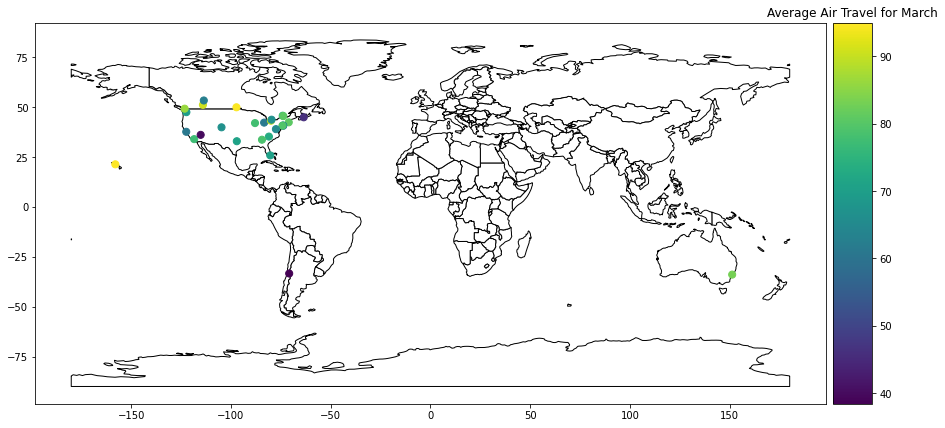

In [106]:
#Plot of average percent of baseline for march
marchtraveldata = airtraveldata_monthly[airtraveldata_monthly['Month'] == 3]

march_geo_df = gpd.GeoDataFrame(marchtraveldata, 
                         geometry = gpd.points_from_xy(marchtraveldata['Long'],
                                                      marchtraveldata['Lat']))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='black')
march_geo_df.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
plt.title('Average Air Travel for March')
plt.show()

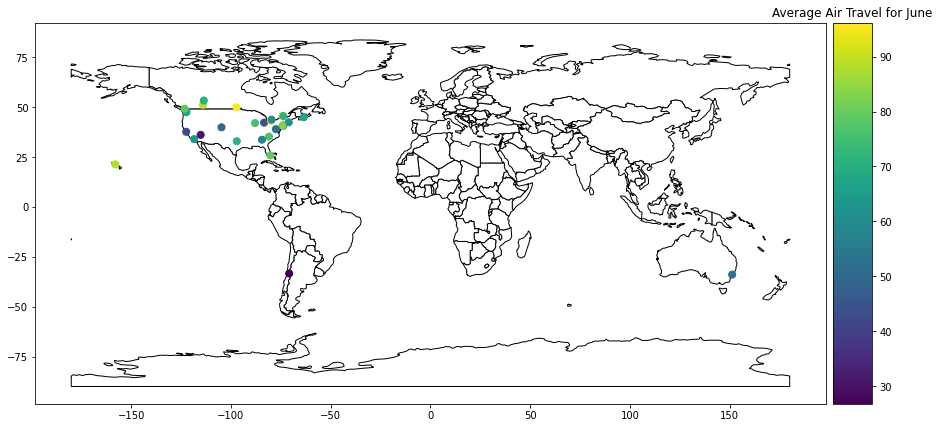

In [114]:
junetraveldata = airtraveldata_monthly[airtraveldata_monthly['Month'] == 6]

june_geo_df = gpd.GeoDataFrame(junetraveldata, 
                         geometry = gpd.points_from_xy(junetraveldata['Long'],
                                                      junetraveldata['Lat']))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='black')
june_geo_df.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
plt.title('Average Air Travel for June')
plt.show()

